1. Basic steps
1.1 Loading Libraries

In [1]:
import numpy as np 
import pandas as pd 
import os
import pandas as pd
import boto3
from io import StringIO
import io
import string
import random
import json
import pickle
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import neighbors



# suppressing warnings
import warnings
warnings.filterwarnings('ignore')


1.2 Loading the entire dataset to check the information

In [2]:
full_train = pd.read_csv("/Users/yaminirege/Desktop/MSBA Fall 2022/2.Q2 - Winter/2. MIS 636-901- Python/Project - Final/Raw files/expedia-hotel-recommendations/train.csv")
full_test = pd.read_csv("/Users/yaminirege/Desktop/MSBA Fall 2022/2.Q2 - Winter/2. MIS 636-901- Python/Project - Final/Raw files/expedia-hotel-recommendations/test.csv")

In [3]:
full_train.shape

(37670293, 24)

In [4]:
full_test.shape

(2528243, 22)

In [5]:
full_train.columns

Index(['date_time', 'site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id',
       'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market',
       'hotel_cluster'],
      dtype='object')

In [6]:
full_test.columns

Index(['id', 'date_time', 'site_name', 'posa_continent',
       'user_location_country', 'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id',
       'hotel_continent', 'hotel_country', 'hotel_market'],
      dtype='object')

Using the rows only which has "is_booking" = 1

In [7]:
# Count the number of rows where is_booking is equal to 1
num_bookings = (full_train['is_booking'] == 1).sum()
num_bookings

3000693

Identifying top clusters in the entire dataset

In [8]:
full_train.groupby('hotel_cluster')['is_booking'].sum().sort_values(ascending = False).head(20)

hotel_cluster
91    120972
48     85377
42     73123
59     66609
28     63978
16     56676
18     55659
95     55125
50     54409
82     54320
21     51470
41     49775
98     48961
64     48017
46     46797
25     46372
9      45309
2      45055
6      44449
47     44084
Name: is_booking, dtype: int64

Selecting only Top 5 clusters and is booking = 1 for further analysis

In [9]:
# Select rows with hotel clusters 91, 48, 42, 59, and 28 from the randomly selected rows
random_sample0 = full_train[(full_train['is_booking'] == 1) & (full_train['hotel_cluster'].isin([91, 48, 42, 59, 28]))]


In [10]:
random_sample0.shape

(410059, 24)

In [11]:
random_sample0[random_sample0['is_booking'] == 1].groupby('hotel_cluster')['is_booking'].sum().sort_values(ascending=False)


hotel_cluster
91    120972
48     85377
42     73123
59     66609
28     63978
Name: is_booking, dtype: int64

Selecting only 1 lakh rows randomly from the original dataset for the project

In [12]:
random_sample = random_sample0.sample(n=100000, random_state=42)

In [13]:
random_sample.to_csv('Final Expedia hotel recommendation dataset 1L.csv', index=False)

In [14]:
random_sample.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
16993221,2014-01-26 02:40:37,2,3,63,451,29000,118.5376,656753,0,0,...,0,1,21873,1,1,1,6,46,1089,91
23837032,2014-10-28 02:11:27,18,2,119,0,27731,NaN,186216,0,0,...,0,1,22235,6,1,1,6,77,2,59
1644236,2014-07-23 20:34:39,2,3,66,184,11740,37.4398,399072,0,0,...,1,1,8236,1,1,1,2,50,656,91
21287998,2014-09-18 16:15:54,2,3,66,462,48217,1037.6654,522505,1,0,...,4,1,8236,1,1,1,2,50,656,42
14115872,2014-06-10 18:01:42,2,3,66,325,32561,206.7990,124909,0,0,...,0,1,44374,1,1,1,2,50,1653,42


In [15]:
random_sample.shape

(100000, 24)

Basic statistics of the data

In [16]:
random_sample.describe().T

,count,mean,std,min,25%,50%,75%,max
site_name,100000.0,7.169870,10.669735,2.0000,2.0000,2.0000,2.0000,5.300000e+01
posa_continent,100000.0,2.855500,0.540595,0.0000,3.0000,3.0000,3.0000,4.000000e+00
user_location_country,100000.0,87.895890,54.298385,0.0000,66.0000,66.0000,66.0000,2.390000e+02
user_location_region,100000.0,314.379360,166.031814,0.0000,174.0000,321.0000,385.0000,1.021000e+03
user_location_city,100000.0,27876.212930,16564.833483,1.0000,13910.0000,27655.0000,42396.0000,5.650700e+04
orig_destination_distance,76421.0,1009.320472,1473.470374,0.0056,165.2992,436.0174,1217.9191,1.166669e+04
user_id,100000.0,600256.328790,343858.208209,11.0000,305813.0000,600696.0000,895193.2500,1.198760e+06
is_mobile,100000.0,0.105040,0.306606,0.0000,0.0000,0.0000,0.0000,1.000000e+00
is_package,100000.0,0.068930,0.253336,0.0000,0.0000,0.0000,0.0000,1.000000e+00
channel,100000.0,6.332630,3.650208,0.0000,2.0000,9.0000,9.0000,1.000000e+01


In [17]:
#resetting index
random_sample = random_sample.reset_index(drop=True)

In [18]:
random_sample.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-01-26 02:40:37,2,3,63,451,29000,118.5376,656753,0,0,...,0,1,21873,1,1,1,6,46,1089,91
1,2014-10-28 02:11:27,18,2,119,0,27731,NaN,186216,0,0,...,0,1,22235,6,1,1,6,77,2,59
2,2014-07-23 20:34:39,2,3,66,184,11740,37.4398,399072,0,0,...,1,1,8236,1,1,1,2,50,656,91
3,2014-09-18 16:15:54,2,3,66,462,48217,1037.6654,522505,1,0,...,4,1,8236,1,1,1,2,50,656,42
4,2014-06-10 18:01:42,2,3,66,325,32561,206.7990,124909,0,0,...,0,1,44374,1,1,1,2,50,1653,42


1.3 checking all variables - in conjunction with bookings 

In [19]:
random_sample['date_time']

0        2014-01-26 02:40:37
1        2014-10-28 02:11:27
2        2014-07-23 20:34:39
3        2014-09-18 16:15:54
4        2014-06-10 18:01:42
                ...         
99995    2014-04-24 19:14:44
99996    2013-08-06 10:07:01
99997    2014-06-13 07:17:35
99998    2014-07-05 00:49:32
99999    2014-03-12 09:14:38
Name: date_time, Length: 100000, dtype: object

In [20]:
#Site name - ID of the Expedia point of sale (i.e. Expedia.com, Expedia.co.uk, Expedia.co.jp, ...)	
random_sample.groupby('site_name')['hotel_cluster'].sum().sort_values(ascending = False).head()

#maximum booking is done using site 2, followed by 11, 24, 37, 34 

site_name
2     4501853
11     391481
34     353418
37     161701
24     103164
Name: hotel_cluster, dtype: int64

In [21]:
random_sample.groupby('site_name')['is_booking'].sum().sort_values(ascending = False).head()
#maximum booking is done using site 2, followed by 11, 24, 37, 34 

site_name
2     75849
11     7064
34     6425
37     3055
24     1916
Name: is_booking, dtype: int64

In [22]:
#posa continent - ID of continent associated with site_name	
random_sample.groupby('posa_continent')['hotel_cluster'].sum().sort_values(ascending = False)

#maximum hotel clusters = 3

posa_continent
3    5259989
1     320404
2     147789
4      73872
0      21136
Name: hotel_cluster, dtype: int64

In [23]:
#posa continent - ID of continent associated with site_name	
random_sample.groupby('posa_continent')['is_booking'].sum().sort_values(ascending = False)

#maximum hotel clusters = 3

posa_continent
3    89574
1     5962
2     2745
4     1344
0      375
Name: is_booking, dtype: int64

In [24]:
#user_location_country - The ID of the country the customer is located	

random_sample.groupby('user_location_country')['is_booking'].sum().sort_values(ascending = False).head(10)

#top country = 66 

user_location_country
66     70455
205    12810
69      2939
3       1863
46      1338
215     1250
77      1030
1        574
133      412
23       410
Name: is_booking, dtype: int64

In [25]:
#user_region_country - The ID of the region the customer is located	 # can be excluded

random_sample.groupby('user_location_region')['is_booking'].sum().sort_values(ascending = False).head(10)

#top region = 174 


user_location_region
174    10718
442     6176
354     5378
220     4616
348     3841
462     3120
258     2767
135     2583
155     2324
363     2313
Name: is_booking, dtype: int64

In [26]:
#user_city_country - The ID of the city the customer is located	 # can be excluded

random_sample.groupby('user_location_city')['is_booking'].sum().sort_values(ascending = False).head(10)

#top city = 5703



user_location_city
48862    1204
25315    1048
36086    1019
35390     955
24103     910
49272     760
14703     696
4687      676
27655     635
2086      628
Name: is_booking, dtype: int64

In [27]:
#orig_destination_distance	Physical distance between a hotel and a customer at the time of search. A null means the distance could not be calculated
#can be excluded

random_sample.groupby('orig_destination_distance')['is_booking'].sum().sort_values(ascending = False).head(10)



orig_destination_distance
5.1309      21
6.4762      14
219.2214    13
0.0056      12
172.6808    12
42.9629     12
249.2719    10
76.6513     10
198.2220    10
167.9331    10
Name: is_booking, dtype: int64

In [28]:
#is_mobile	1 when a user connected from a mobile device, 0 otherwise

random_sample.groupby('is_mobile')['is_booking'].sum().sort_values(ascending = False).head(10)

#max users are not connected via mobile

is_mobile
0    89496
1    10504
Name: is_booking, dtype: int64

In [29]:
#is_package	1 if the click/booking was generated as a part of a package (i.e. combined with a flight), 0 otherwise

random_sample.groupby('is_package')['is_booking'].sum().sort_values(ascending = False).head(10)

#majority was with a package

is_package
0    93107
1     6893
Name: is_booking, dtype: int64

In [30]:
#channel	ID of a marketing channel

random_sample.groupby('channel')['is_booking'].sum().sort_values(ascending = False).head(10)

#major bookings = channel 9


channel
9    62778
0    11993
1     8451
2     5899
5     4475
4     3247
3     2430
7      339
8      315
6       66
Name: is_booking, dtype: int64

In [31]:
#srch_ci	Checkin date
#srch_co	Checkout date	
random_sample['srch_ci']


0        2014-01-27
1        2015-08-10
2        2014-07-24
3        2014-09-18
4        2014-06-11
            ...    
99995    2014-04-26
99996    2013-08-08
99997    2014-08-04
99998    2014-07-13
99999    2014-04-07
Name: srch_ci, Length: 100000, dtype: object

In [32]:
#srch_adults_cnt	The number of adults specified in the hotel room
#srch_children_cnt	The number of (extra occupancy) children specified in the hotel room
#srch_rm_cnt	The number of hotel rooms specified in the search

In [33]:
random_sample.groupby('srch_adults_cnt')['is_booking'].sum().sort_values(ascending = False).head(10)

#max booking is with 2 adults, followed by 1 


srch_adults_cnt
2    53394
1    35580
3     4932
4     4409
6      639
5      600
8      212
7      111
0       92
9       31
Name: is_booking, dtype: int64

In [34]:
random_sample.groupby('srch_children_cnt')['is_booking'].sum().sort_values(ascending = False).head(10)

#max booking is with 0 adults, followed by 1


srch_children_cnt
0    78990
1    11715
2     7411
3     1338
4      423
5       57
6       44
7       13
8        7
9        2
Name: is_booking, dtype: int64

In [35]:
random_sample.groupby('srch_rm_cnt')['is_booking'].sum().sort_values(ascending = False).head(10)
#can be excluded

srch_rm_cnt
1    90369
2     7563
3     1296
4      379
5      196
6       84
8       67
7       43
0        3
Name: is_booking, dtype: int64

In [36]:
#srch_destination_id	ID of the destination where the hotel search was performed
#srch_destination_type_id	Type of destination
random_sample.groupby('srch_destination_id')['is_booking'].sum().sort_values(ascending = False).head(10)

#can be excluded

srch_destination_id
8291     668
8268     547
8278     544
8235     522
11353    522
8273     517
8277     515
8216     491
8230     490
8250     483
Name: is_booking, dtype: int64

In [37]:
random_sample.groupby('srch_destination_type_id')['is_booking'].sum().sort_values(ascending = False).head(10)

#1 is the top followed by 6

srch_destination_type_id
1    47565
6    26865
3    10643
5    10109
4     4525
8      282
7        6
9        5
Name: is_booking, dtype: int64

In [38]:
random_sample.groupby('hotel_continent')['is_booking'].sum().sort_values(ascending = False).head(10)


hotel_continent
2    84963
6     8299
3     3523
4     2249
0      811
5      155
Name: is_booking, dtype: int64

In [39]:
random_sample.groupby('hotel_country')['is_booking'].sum().sort_values(ascending = False).head(10)

#50 has the highest booking

hotel_country
50     76474
198     8489
70      2229
106     1568
144     1270
77      1144
8        912
63       654
204      637
105      591
Name: is_booking, dtype: int64

In [40]:
random_sample.groupby('hotel_market')['is_booking'].sum().sort_values(ascending = False).head(10)
#can be excluded

hotel_market
191    2370
365    2188
366    1505
637    1414
350    1407
406    1393
682    1348
659    1336
656    1312
409    1306
Name: is_booking, dtype: int64

In [41]:
#cnt	Numer of similar events in the context of the same user session	bigint

random_sample.groupby('cnt')['is_booking'].sum().sort_values(ascending = False).head(10)


cnt
1    98873
2     1038
3       67
4       12
5        5
6        3
7        2
Name: is_booking, dtype: int64

In [42]:
random_sample.groupby('hotel_cluster')['is_booking'].sum().sort_values(ascending = False).head(20)


hotel_cluster
91    29412
48    20871
42    17870
59    16214
28    15633
Name: is_booking, dtype: int64

2.0 Data Preprocessing 

2.1 Creating new variable 

stay_dur: number of duration of stay
no_of_days_bet_booking: number of days between the booking and
Cin_day: Check-in day
Cin_month: Check-in month
Cin_year: Check-out year

In [43]:
# Function to convert date object into relevant attributes
def convert_date_into_days(df):
    random_sample['srch_ci'] = pd.to_datetime(random_sample['srch_ci'])
    random_sample['srch_co'] = pd.to_datetime(random_sample['srch_co'])
    random_sample['date_time'] = pd.to_datetime(random_sample['date_time'])

In [44]:
## Convert srch_ci and srch_co to datetime objects
random_sample['srch_ci'] = pd.to_datetime(random_sample['srch_ci'], format='%Y-%m-%d')
random_sample['srch_co'] = pd.to_datetime(random_sample['srch_co'], format='%Y-%m-%d')
random_sample['date_time'] = pd.to_datetime(random_sample['date_time'], format='%Y-%m-%d')

In [45]:
#calculate stay duration
random_sample['stay_dur'] = (random_sample['srch_co'] - random_sample['srch_ci']).astype('timedelta64[D]')

In [46]:
#no of day before booking
random_sample['no_of_days_bef_booking'] = (random_sample['srch_ci'] - random_sample['date_time']).astype('timedelta64[D]')

In [47]:
 # For hotel check-in
    # Month, Year, Day
random_sample['Cin_day'] = random_sample["srch_ci"].apply(lambda x: x.day)
random_sample['Cin_month'] = random_sample["srch_ci"].apply(lambda x: x.month)
random_sample['Cin_year'] = random_sample["srch_ci"].apply(lambda x: x.year)

In [48]:
# for date of booking Month, Year, Day
random_sample['book_day'] = random_sample["date_time"].apply(lambda x: x.day)
random_sample['book_month'] = random_sample["date_time"].apply(lambda x: x.month)
random_sample['book_year'] = random_sample["date_time"].apply(lambda x: x.year)

In [49]:
convert_date_into_days(random_sample)


In [50]:
random_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   date_time                  100000 non-null  datetime64[ns]
 1   site_name                  100000 non-null  int64         
 2   posa_continent             100000 non-null  int64         
 3   user_location_country      100000 non-null  int64         
 4   user_location_region       100000 non-null  int64         
 5   user_location_city         100000 non-null  int64         
 6   orig_destination_distance  76421 non-null   float64       
 7   user_id                    100000 non-null  int64         
 8   is_mobile                  100000 non-null  int64         
 9   is_package                 100000 non-null  int64         
 10  channel                    100000 non-null  int64         
 11  srch_ci                    100000 non-null  datetime6

In [51]:
random_sample.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,hotel_market,hotel_cluster,stay_dur,no_of_days_bef_booking,Cin_day,Cin_month,Cin_year,book_day,book_month,book_year
0,2014-01-26 02:40:37,2,3,63,451,29000,118.5376,656753,0,0,...,1089,91,4.0,0.0,27,1,2014,26,1,2014
1,2014-10-28 02:11:27,18,2,119,0,27731,NaN,186216,0,0,...,2,59,2.0,285.0,10,8,2015,28,10,2014
2,2014-07-23 20:34:39,2,3,66,184,11740,37.4398,399072,0,0,...,656,91,3.0,0.0,24,7,2014,23,7,2014
3,2014-09-18 16:15:54,2,3,66,462,48217,1037.6654,522505,1,0,...,656,42,1.0,-1.0,18,9,2014,18,9,2014
4,2014-06-10 18:01:42,2,3,66,325,32561,206.7990,124909,0,0,...,1653,42,1.0,0.0,11,6,2014,10,6,2014


In [52]:
#using pivot tables

pd.pivot_table(random_sample, values='is_booking', index=['Cin_year'],
                    aggfunc=np.sum)

,is_booking
Cin_year,
2013,31814
2014,63310
2015,4872
2016,4


In [53]:
pd.pivot_table(random_sample, values='is_booking', index=['book_year'],
                    aggfunc=np.sum)

,is_booking
book_year,
2013,33723
2014,66277


In [54]:
#using pivot tables

pd.pivot_table(random_sample, values='is_booking', index=['Cin_month'],
               aggfunc=np.sum).sort_values(by='is_booking', ascending=False)

#december has maximum check in

,is_booking
Cin_month,
8,10916
12,10210
10,9892
7,9480
11,9312
9,8845
6,8102
5,7976
4,7224


In [55]:
#using pivot tables

pd.pivot_table(random_sample, values='is_booking', index=['book_month'],
               aggfunc=np.sum).sort_values(by='is_booking', ascending=False)

#december has maximum check in and bookings in july and aug

,is_booking
book_month,
7,9821
10,9798
8,9743
12,9743
9,9222
11,9046
6,8277
5,8102
4,7684


2.2 cleaning data ; missing values, cardanality etc and excluding data with least corr 

In [56]:
# Check the percentage of Nan in dataset
total = random_sample.isnull().sum().sort_values(ascending=False)
percent = (random_sample.isnull().sum()/random_sample['hotel_cluster'].count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

#exclude orig_destination_distance from data

,Total,Percent
orig_destination_distance,23579,0.23579
date_time,0,0.00000
srch_destination_type_id,0,0.00000
book_month,0,0.00000
book_day,0,0.00000
Cin_year,0,0.00000
Cin_month,0,0.00000
Cin_day,0,0.00000
no_of_days_bef_booking,0,0.00000
stay_dur,0,0.00000


In [57]:
#checking categorical variables

list(set(random_sample.dtypes[random_sample.dtypes == object].index))

[]

In [58]:
#checking numerical variables

numerical_variables = [col for col in random_sample.columns if random_sample[col].dtype != object and col != 'hotel_cluster']


In [59]:
numerical_variables 

['date_time',
 'site_name',
 'posa_continent',
 'user_location_country',
 'user_location_region',
 'user_location_city',
 'orig_destination_distance',
 'user_id',
 'is_mobile',
 'is_package',
 'channel',
 'srch_ci',
 'srch_co',
 'srch_adults_cnt',
 'srch_children_cnt',
 'srch_rm_cnt',
 'srch_destination_id',
 'srch_destination_type_id',
 'is_booking',
 'cnt',
 'hotel_continent',
 'hotel_country',
 'hotel_market',
 'stay_dur',
 'no_of_days_bef_booking',
 'Cin_day',
 'Cin_month',
 'Cin_year',
 'book_day',
 'book_month',
 'book_year']

In [60]:
zero_variance_numerical_variables =  []

for i in numerical_variables: #for each num var.
    if len(random_sample[i].value_counts().index) == 1: #check how many levels 
        zero_variance_numerical_variables.append(i)# your code to find the 
                                # numerical variables with zero variance goes in here

zero_variance_numerical_variables


['is_booking']

In [61]:
(random_sample.corr()['hotel_cluster']).sort_values(ascending=False)

#none of the variables have strong correlation thus linear regression wont work. 

hotel_cluster                1.000000
posa_continent               0.050987
srch_children_cnt            0.009848
channel                      0.007918
stay_dur                     0.007280
hotel_market                 0.002289
book_year                    0.002232
srch_destination_type_id     0.002115
Cin_day                      0.001789
book_day                     0.000529
cnt                         -0.000410
srch_destination_id         -0.000533
srch_rm_cnt                 -0.000875
Cin_month                   -0.003242
is_mobile                   -0.003971
user_location_city          -0.004408
user_id                     -0.004518
is_package                  -0.007476
book_month                  -0.009204
Cin_year                    -0.009432
srch_adults_cnt             -0.012315
user_location_region        -0.012731
no_of_days_bef_booking      -0.036113
user_location_country       -0.043563
orig_destination_distance   -0.053722
site_name                   -0.079785
hotel_countr

In [62]:
random_sample.columns

Index(['date_time', 'site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id',
       'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market',
       'hotel_cluster', 'stay_dur', 'no_of_days_bef_booking', 'Cin_day',
       'Cin_month', 'Cin_year', 'book_day', 'book_month', 'book_year'],
      dtype='object')

In [63]:
random_sample.shape

(100000, 32)

Dropping variables which are not adding value basis above pre-processing

In [64]:
random_sample2 = random_sample.drop(['date_time', 'user_location_region', 'user_location_city', 'orig_destination_distance', 
                              'user_id', 'srch_ci','srch_co', 'srch_adults_cnt', 'srch_children_cnt','cnt','is_booking'], axis=1)

In [65]:
random_sample2.shape

(100000, 21)

2.3 Missing Value imputation

In [66]:
# Check the percentage of Nan in dataset
random_sample2.isnull().sum().sort_values(ascending=False)

site_name                   0
hotel_market                0
book_month                  0
book_day                    0
Cin_year                    0
Cin_month                   0
Cin_day                     0
no_of_days_bef_booking      0
stay_dur                    0
hotel_cluster               0
hotel_country               0
posa_continent              0
hotel_continent             0
srch_destination_type_id    0
srch_destination_id         0
srch_rm_cnt                 0
channel                     0
is_package                  0
is_mobile                   0
user_location_country       0
book_year                   0
dtype: int64

In [67]:
#fill for numerical col with median
numerical_variables1 = [col for col in random_sample2.columns if random_sample2[col].dtype != object and col != 'hotel_cluster']
random_sample2[numerical_variables1] = random_sample2[numerical_variables1].fillna(random_sample2[numerical_variables1].median(), inplace = False)

In [68]:
random_sample2.isnull().sum().sort_values(ascending=False)

site_name                   0
hotel_market                0
book_month                  0
book_day                    0
Cin_year                    0
Cin_month                   0
Cin_day                     0
no_of_days_bef_booking      0
stay_dur                    0
hotel_cluster               0
hotel_country               0
posa_continent              0
hotel_continent             0
srch_destination_type_id    0
srch_destination_id         0
srch_rm_cnt                 0
channel                     0
is_package                  0
is_mobile                   0
user_location_country       0
book_year                   0
dtype: int64

In [69]:
random_sample2.head()

,site_name,posa_continent,user_location_country,is_mobile,is_package,channel,srch_rm_cnt,srch_destination_id,srch_destination_type_id,hotel_continent,...,hotel_market,hotel_cluster,stay_dur,no_of_days_bef_booking,Cin_day,Cin_month,Cin_year,book_day,book_month,book_year
0,2,3,63,0,0,9,1,21873,1,6,...,1089,91,4.0,0.0,27,1,2014,26,1,2014
1,18,2,119,0,0,2,1,22235,6,6,...,2,59,2.0,285.0,10,8,2015,28,10,2014
2,2,3,66,0,0,2,1,8236,1,2,...,656,91,3.0,0.0,24,7,2014,23,7,2014
3,2,3,66,1,0,9,1,8236,1,2,...,656,42,1.0,-1.0,18,9,2014,18,9,2014
4,2,3,66,0,0,9,1,44374,1,2,...,1653,42,1.0,0.0,11,6,2014,10,6,2014


3.0 Visualization of Data


<AxesSubplot:>

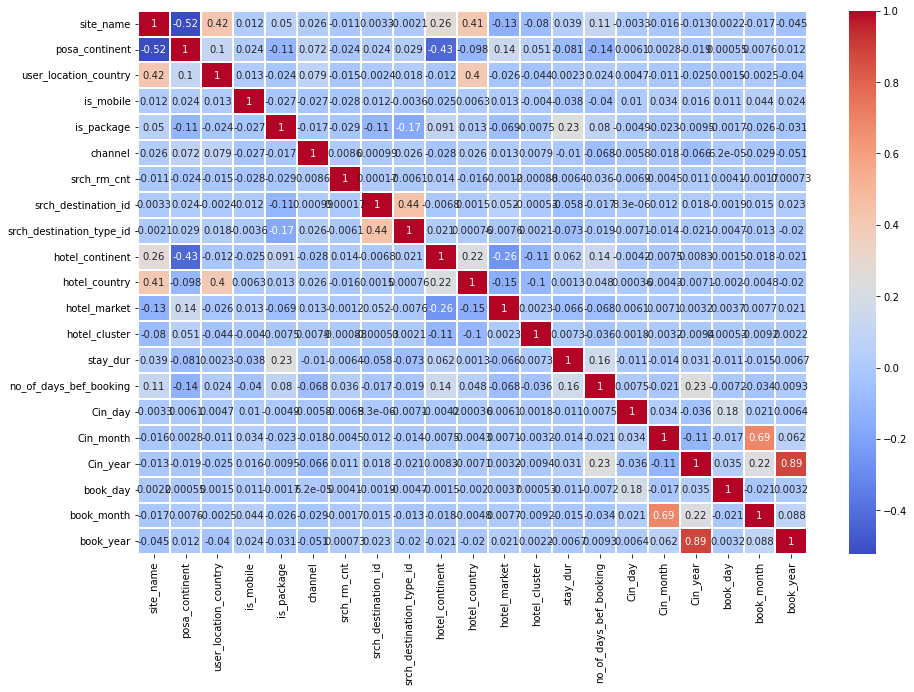

In [70]:
#checking correlation 
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.heatmap(random_sample2.corr(),cmap='coolwarm',ax=ax,annot=True,linewidths=2)

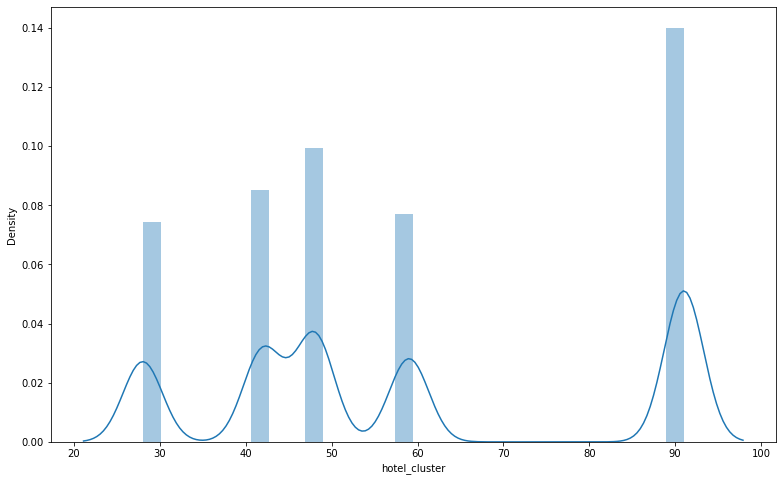

In [71]:
fig, ax = plt.subplots(figsize=(13, 8))

ax = sns.distplot(random_sample2['hotel_cluster'])

Text(0, 0.5, 'Count')

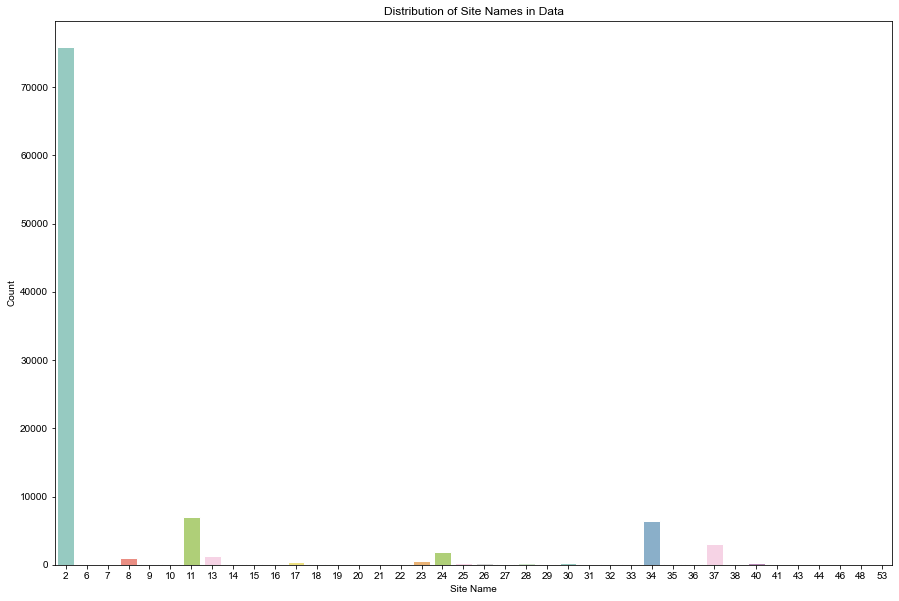

In [72]:
fig, ax = plt.subplots(figsize=(15, 10))

sns.set(style="white") #i.e the graph will have no gridlined, for grid line use whitegrid

#plot bar

ax = sns.countplot(x = 'site_name', data = random_sample2,
    palette="Set3")


ax.set_title("Distribution of Site Names in Data")
ax.set_xlabel("Site Name")
ax.set_ylabel("Count")

Text(0, 0.5, 'Count')

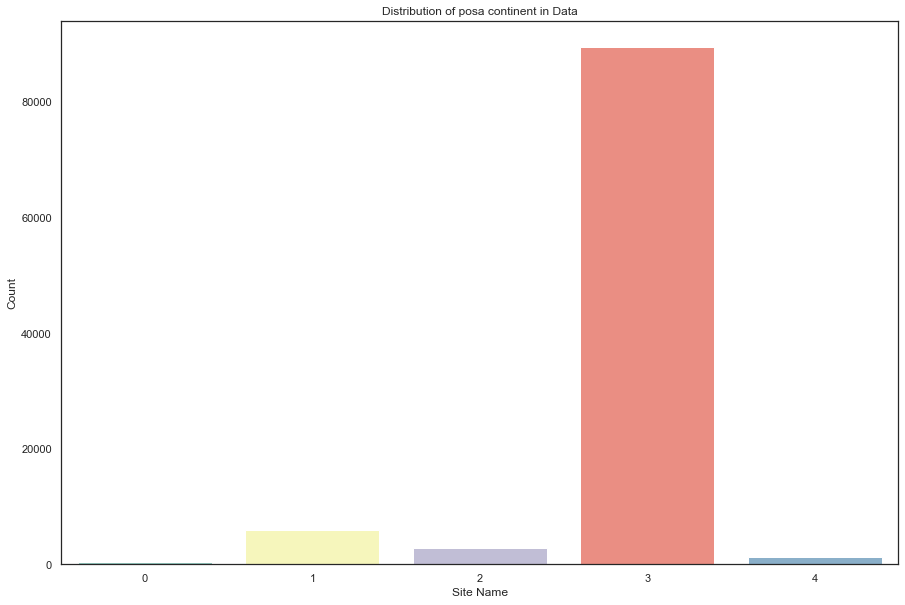

In [73]:
fig, ax = plt.subplots(figsize=(15, 10))

sns.set(style="white") #i.e the graph will have no gridlined, for grid line use whitegrid

#plot bar

ax = sns.countplot(x = 'posa_continent', data = random_sample2,
    palette="Set3")


ax.set_title("Distribution of posa continent in Data")
ax.set_xlabel("Site Name")
ax.set_ylabel("Count")

<AxesSubplot:>

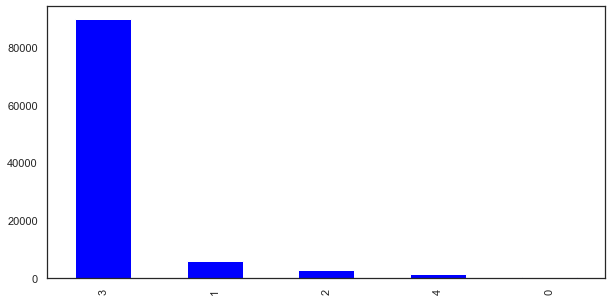

In [74]:
random_sample2["posa_continent"].value_counts().plot(kind = 'bar', color="blue",figsize=(10,5))

<AxesSubplot:>

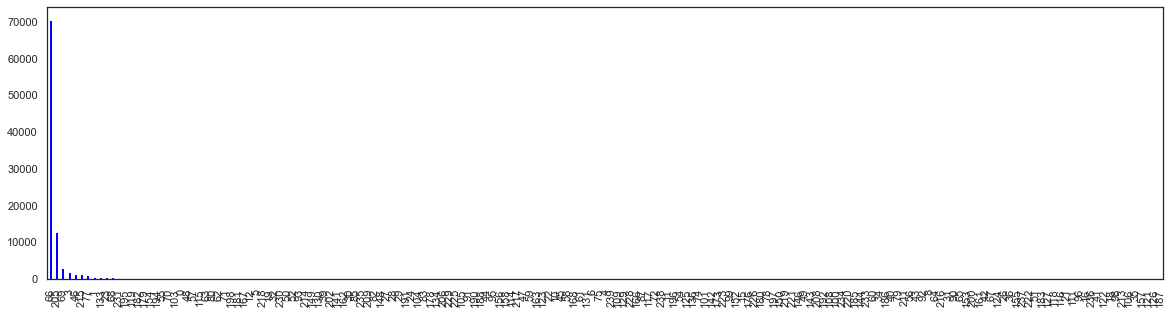

In [75]:
random_sample2["user_location_country"].value_counts().plot(kind = 'bar', color="blue",figsize=(20,5))

Text(0, 0.5, 'Count')

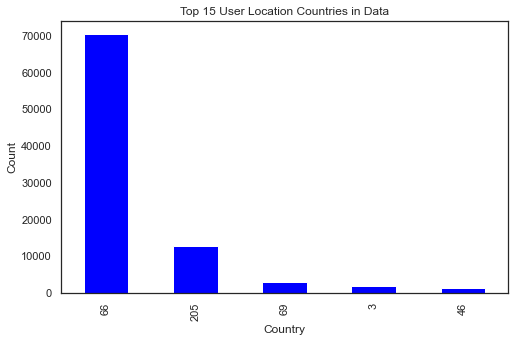

In [76]:
#looks too cluttered thus used only top 25, also there are hardly any substantial values after that

ax = random_sample2["user_location_country"].value_counts().nlargest(5).plot(kind = 'bar', color="blue",figsize=(8,5))

# Add title and axis labels
ax.set_title("Top 15 User Location Countries in Data")
ax.set_xlabel("Country")
ax.set_ylabel("Count")

Text(0, 0.5, 'Count')

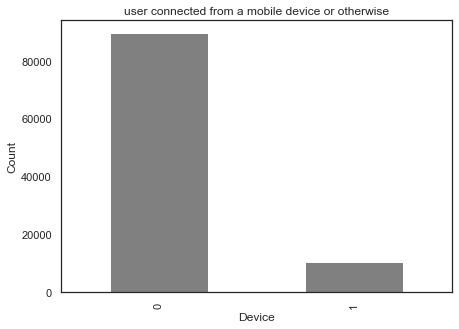

In [77]:

ax = random_sample2["is_mobile"].value_counts().plot(kind = 'bar', color="grey",figsize=(7,5))

# Add title and axis labels
ax.set_title("user connected from a mobile device or otherwise")
ax.set_xlabel("Device")
ax.set_ylabel("Count")

Text(0, 0.5, 'Count')

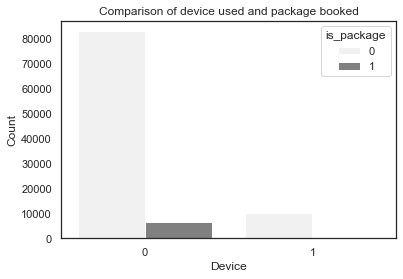

In [78]:
sns.set(style="white") #i.e the graph will have no gridlined, for grid line use whitegrid

#plot bar

#based on contract - giving nos of people having multiple lines. 
ax = sns.countplot(x = 'is_mobile', hue = 'is_package', data = random_sample2,
    color = "grey")

# Add title and axis labels
ax.set_title("Comparison of device used and package booked")
ax.set_xlabel("Device")
ax.set_ylabel("Count")



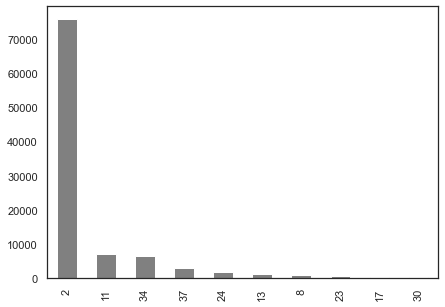

In [79]:
ax1 = random_sample2["site_name"].value_counts().nlargest(10).plot(kind = 'bar', color="grey",figsize=(7,5))

Text(0, 0.5, 'Count')

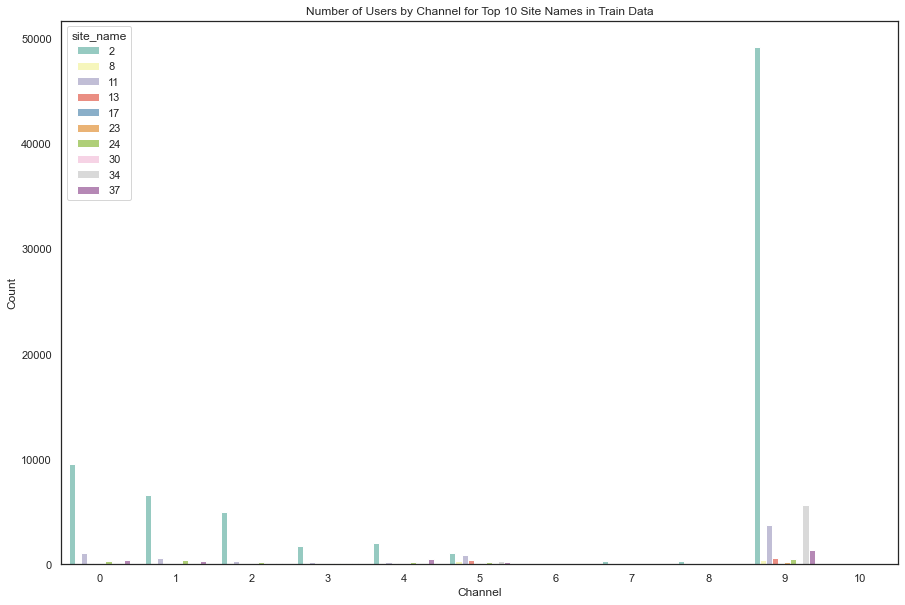

In [80]:
# Get the top 10 site names by count
top_10_sites = random_sample2['site_name'].value_counts().nlargest(10).index.tolist()

# Create a subset of the data that contains only the top 10 sites and their channels
subset_data = random_sample2[random_sample2['site_name'].isin(top_10_sites)][['site_name', 'channel']]

# Plot the count of users for each channel
fig, ax = plt.subplots(figsize=(15, 10))
sns.countplot(x='channel', hue='site_name', data=subset_data, palette='Set3', ax=ax)

# Add title and axis labels
ax.set_title("Number of Users by Channel for Top 10 Site Names in Train Data")
ax.set_xlabel("Channel")
ax.set_ylabel("Count")

Text(0, 0.5, 'Count')

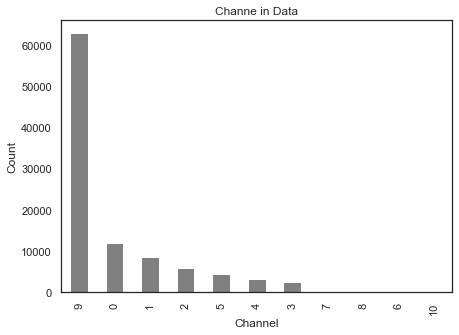

In [81]:
ax = random_sample2["channel"].value_counts().plot(kind = 'bar', color="grey",figsize=(7,5))

# Add title and axis labels
ax.set_title("Channe in Data")
ax.set_xlabel("Channel")
ax.set_ylabel("Count")

Text(0.5, 0, 'stay duration in days')

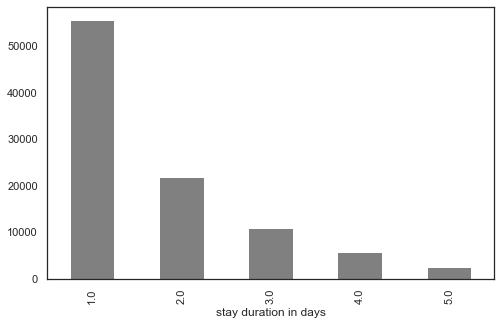

In [82]:
ax = random_sample2["stay_dur"].value_counts().nlargest(5).plot(kind = 'bar', color="grey",figsize=(8,5))

# Add title and axis labels

ax.set_xlabel("stay duration in days")


Text(0.5, 0, 'No of adults')

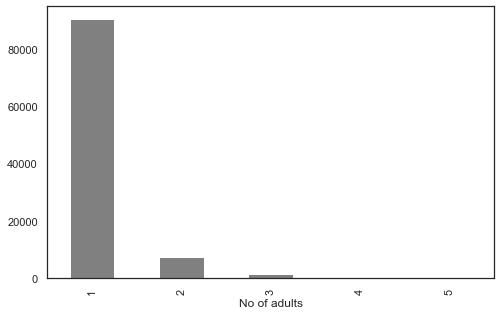

In [83]:
ax = random_sample2["srch_rm_cnt"].value_counts().nlargest(5).plot(kind = 'bar', color="grey",figsize=(8,5))

# Add title and axis labels
ax.set_xlabel("No of adults")


Text(0, 0.5, 'Count')

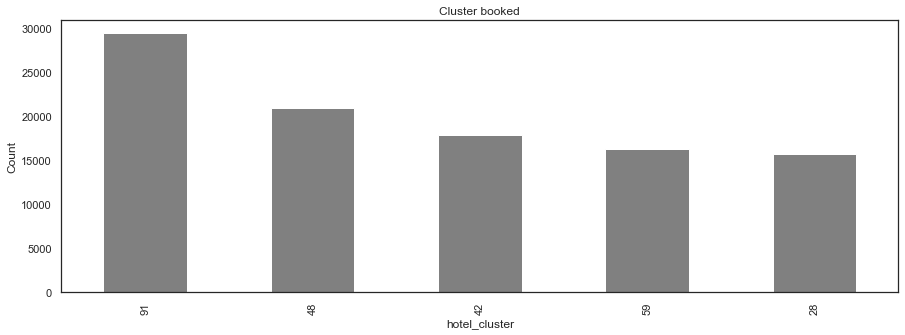

In [84]:
ax = random_sample2["hotel_cluster"].value_counts().plot(kind = 'bar', color="grey",figsize=(15,5))

# Add title and axis labels
ax.set_title("Cluster booked")
ax.set_xlabel("hotel_cluster")
ax.set_ylabel("Count")

<AxesSubplot:>

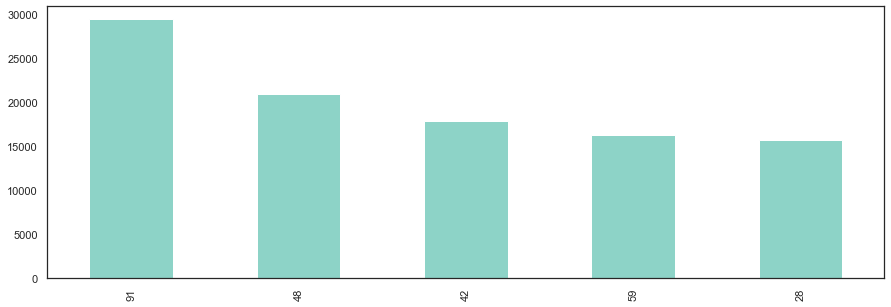

In [85]:
#If channel is 9 which are clusters which are booked?

channel = 9

fig, (axis1) = plt.subplots(1,1,figsize=(15,10))

channel = random_sample2[random_sample2["channel"] == channel]
random_sample2["hotel_cluster"].value_counts().plot(kind='bar',colormap="Set3",figsize=(15,5))

<AxesSubplot:>

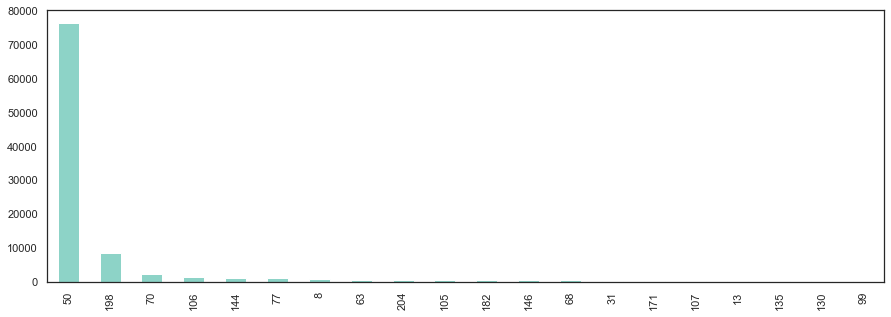

In [86]:
## Where do most of the customers from a country 66 travel?¶ -- 50

user_country_id = 66

fig, (axis1) = plt.subplots(1,1,figsize=(15,10))

random_sample2[random_sample2["user_location_country"] == user_country_id]
random_sample2["hotel_country"].value_counts().nlargest(20).plot(kind='bar',colormap="Set3",figsize=(15,5))

<AxesSubplot:>

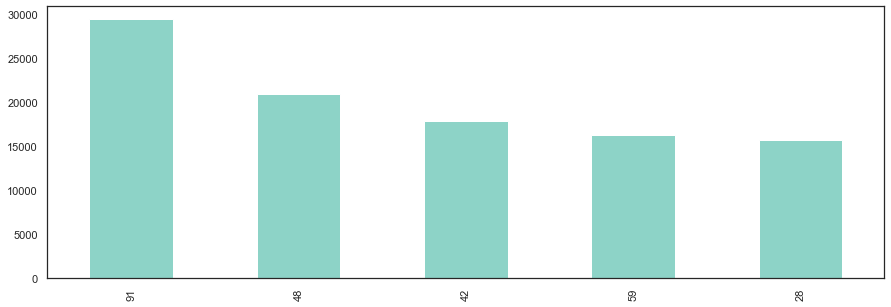

In [87]:
#most frequent hotel clusters booked by customers from a country 66¶


user_country_id = 66

fig, (axis1) = plt.subplots(1,1,figsize=(15,10))

random_sample2[random_sample2["user_location_country"] == user_country_id]
random_sample2["hotel_cluster"].value_counts().nlargest(20).plot(kind='bar',colormap="Set3",figsize=(15,5))


<AxesSubplot:xlabel='hotel_continent', ylabel='count'>

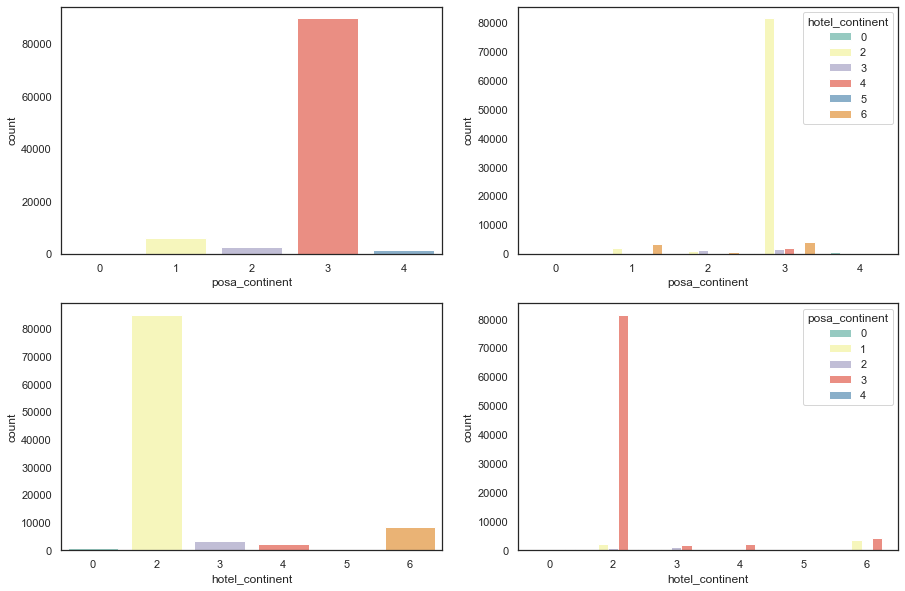

In [88]:
# Plot post_continent & hotel_continent

fig, ((axis1,axis2),(axis3,axis4)) = plt.subplots(2,2,figsize=(15,10))

# Plot frequency for each posa_continent
sns.countplot('posa_continent', data=random_sample2,order=[0,1,2,3,4],palette="Set3",ax=axis1)

# Plot frequency for each posa_continent decomposed by hotel_continent
sns.countplot('posa_continent', hue='hotel_continent',data=random_sample2,order=[0,1,2,3,4],palette="Set3",ax=axis2)

# Plot frequency for each hotel_continent
sns.countplot('hotel_continent', data=random_sample2,order=[0,2,3,4,5,6],palette="Set3",ax=axis3)

# Plot frequency for each hotel_continent decomposed by posa_continent
sns.countplot('hotel_continent', hue='posa_continent', data=random_sample2, order=[0,2,3,4,5,6],palette="Set3",ax=axis4)

<AxesSubplot:xlabel='channel', ylabel='count'>

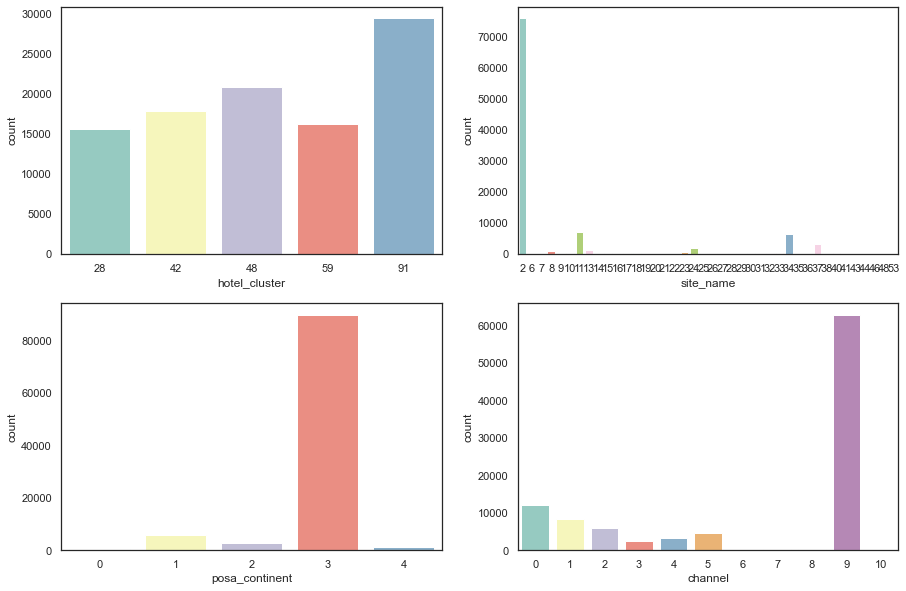

In [89]:
# Plot post_continent & hotel_continent

fig, ((axis1,axis2),(axis3,axis4)) = plt.subplots(2,2,figsize=(15,10))

# Plot frequency for each posa_continent
sns.countplot('hotel_cluster', data=random_sample2,palette="Set3",ax=axis1)

# Plot frequency for each hotel_continent
sns.countplot('site_name', data=random_sample2,palette="Set3",ax=axis2)

# Plot frequency for each hotel_continent
sns.countplot('posa_continent', data=random_sample2,palette="Set3",ax=axis3)

# Plot frequency for each hotel_continent
sns.countplot('channel', data=random_sample2,palette="Set3",ax=axis4)


Text(0.5, 0, 'Checkin Month')

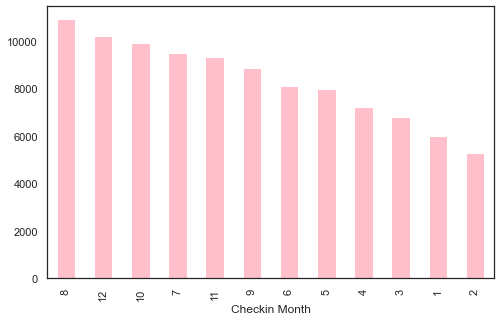

In [90]:
ax = random_sample2["Cin_month"].value_counts().plot(kind = 'bar', color="pink",figsize=(8,5))

ax.set_xlabel("Checkin Month")


Text(0.5, 0, 'Booking Month')

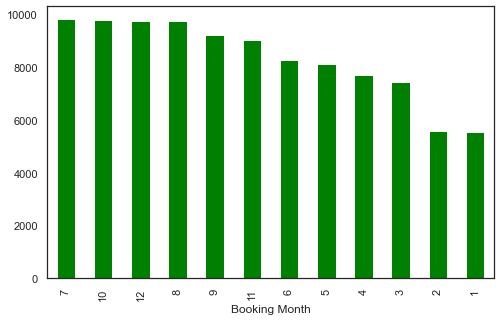

In [91]:
ax = random_sample2["book_month"].value_counts().plot(kind = 'bar', color="green",figsize=(8,5))

ax.set_xlabel("Booking Month")

Text(0.5, 0, 'Stay duration in days')

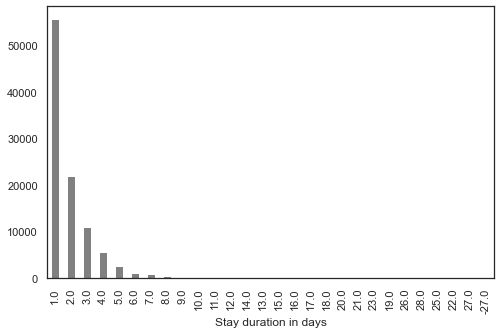

In [92]:
ax = random_sample2["stay_dur"].value_counts().plot(kind = 'bar', color="grey",figsize=(8,5))


ax.set_xlabel("Stay duration in days")

Text(0, 0.5, 'Count')

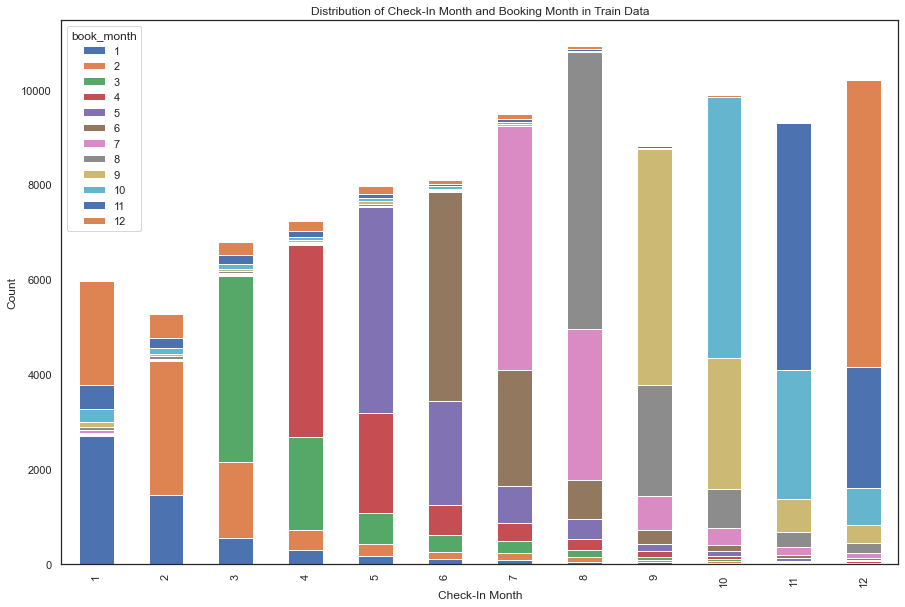

In [93]:
# Create a subset of the data that contains only the cin_month and book_month columns
subset_data = random_sample2[['Cin_month', 'book_month']]

# Group the data by cin_month and book_month, and count the number of occurrences
grouped_data = subset_data.groupby(['Cin_month', 'book_month']).size().reset_index(name='count')

# Pivot the data to create a matrix with cin_month as the rows, book_month as the columns, and count as the values
pivot_data = grouped_data.pivot(index='Cin_month', columns='book_month', values='count')

# Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(15, 10))
pivot_data.plot(kind='bar', stacked=True, ax=ax)

# Add title and axis labels
ax.set_title("Distribution of Check-In Month and Booking Month in Train Data")
ax.set_xlabel("Check-In Month")
ax.set_ylabel("Count")

Scaling the Data

In [94]:
#Import standardscaler

from sklearn.preprocessing import StandardScaler

In [95]:
numerical_variables1

['site_name',
 'posa_continent',
 'user_location_country',
 'is_mobile',
 'is_package',
 'channel',
 'srch_rm_cnt',
 'srch_destination_id',
 'srch_destination_type_id',
 'hotel_continent',
 'hotel_country',
 'hotel_market',
 'stay_dur',
 'no_of_days_bef_booking',
 'Cin_day',
 'Cin_month',
 'Cin_year',
 'book_day',
 'book_month',
 'book_year']

In [96]:
#create a col names for std values

new_col = [i+'_standarized' for i in numerical_variables1]

In [97]:
#convert to numpy

array = random_sample2[numerical_variables1].values

In [98]:
#create standrisation instance

data_scaler = StandardScaler().fit(array)

In [99]:
#standarised the numerical variables 

data_rescaled = pd.DataFrame(data_scaler.transform(array), columns = new_col)

In [100]:
data_rescaled.head()

,site_name_standarized,posa_continent_standarized,user_location_country_standarized,is_mobile_standarized,is_package_standarized,channel_standarized,srch_rm_cnt_standarized,srch_destination_id_standarized,srch_destination_type_id_standarized,hotel_continent_standarized,hotel_country_standarized,hotel_market_standarized,stay_dur_standarized,no_of_days_bef_booking_standarized,Cin_day_standarized,Cin_month_standarized,Cin_year_standarized,book_day_standarized,book_month_standarized,book_year_standarized
0,-0.484538,0.267300,-0.458504,-0.342591,-0.27209,0.730748,-0.267192,0.457922,-0.963171,3.110639,-0.502550,1.299655,1.270222,-0.579697,1.234963,-1.844517,0.496336,1.170985,-1.828831,0.713316
1,1.015038,-1.582524,0.572840,-0.342591,-0.27209,-1.186960,-0.267192,0.488291,1.311979,3.110639,0.151284,-1.652012,0.034471,5.673920,-0.691792,0.267095,2.339123,1.399157,0.896117,0.713316
2,-0.484538,0.267300,-0.403253,-0.342591,-0.27209,-1.186960,-0.267192,-0.686119,-0.963171,-0.346203,-0.418184,0.123876,0.652347,-0.579697,0.894947,-0.034564,0.496336,0.828727,-0.012199,0.713316
3,-0.484538,0.267300,-0.403253,2.918935,-0.27209,0.730748,-0.267192,-0.686119,-0.963171,-0.346203,-0.418184,0.123876,-0.583404,-0.601640,0.214916,0.568753,0.496336,0.258297,0.593345,0.713316
4,-0.484538,0.267300,-0.403253,-0.342591,-0.27209,0.730748,-0.267192,2.345585,-0.963171,-0.346203,-0.418184,2.831155,-0.583404,-0.579697,-0.578454,-0.336223,0.496336,-0.654390,-0.314971,0.713316


In [101]:
#resetting index
random_sample3 = random_sample2.reset_index(drop=True)


In [102]:
df = random_sample3.drop(numerical_variables1, axis = 1)

In [103]:
random_sample4 = pd.concat([df, data_rescaled], axis = 1)

In [104]:
random_sample4

,hotel_cluster,site_name_standarized,posa_continent_standarized,user_location_country_standarized,is_mobile_standarized,is_package_standarized,channel_standarized,srch_rm_cnt_standarized,srch_destination_id_standarized,srch_destination_type_id_standarized,...,hotel_country_standarized,hotel_market_standarized,stay_dur_standarized,no_of_days_bef_booking_standarized,Cin_day_standarized,Cin_month_standarized,Cin_year_standarized,book_day_standarized,book_month_standarized,book_year_standarized
0,91,-0.484538,0.267300,-0.458504,-0.342591,-0.27209,0.730748,-0.267192,0.457922,-0.963171,...,-0.502550,1.299655,1.270222,-0.579697,1.234963,-1.844517,0.496336,1.170985,-1.828831,0.713316
1,59,1.015038,-1.582524,0.572840,-0.342591,-0.27209,-1.186960,-0.267192,0.488291,1.311979,...,0.151284,-1.652012,0.034471,5.673920,-0.691792,0.267095,2.339123,1.399157,0.896117,0.713316
2,91,-0.484538,0.267300,-0.403253,-0.342591,-0.27209,-1.186960,-0.267192,-0.686119,-0.963171,...,-0.418184,0.123876,0.652347,-0.579697,0.894947,-0.034564,0.496336,0.828727,-0.012199,0.713316
3,42,-0.484538,0.267300,-0.403253,2.918935,-0.27209,0.730748,-0.267192,-0.686119,-0.963171,...,-0.418184,0.123876,-0.583404,-0.601640,0.214916,0.568753,0.496336,0.258297,0.593345,0.713316
4,42,-0.484538,0.267300,-0.403253,-0.342591,-0.27209,0.730748,-0.267192,2.345585,-0.963171,...,-0.418184,2.831155,-0.583404,-0.579697,-0.578454,-0.336223,0.496336,-0.654390,-0.314971,0.713316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,48,1.483655,-3.432348,-1.600348,-0.342591,-0.27209,-0.365085,1.753925,1.445923,-0.963171,...,2.618982,2.453711,-0.583404,-0.557755,1.121624,-0.939540,0.496336,0.942813,-0.920515,0.713316
99996,48,-0.484538,0.267300,-0.403253,-0.342591,-0.27209,0.730748,1.753925,0.677133,-0.963171,...,-0.418184,1.899764,-0.583404,-0.557755,-0.918469,0.267095,-1.346451,-1.110734,0.290573,-1.401904
99997,42,-0.484538,0.267300,-0.403253,-0.342591,-0.27209,-1.734877,-0.267192,-0.369090,-0.963171,...,-0.418184,-0.226413,0.034471,0.539371,-1.371823,0.267095,0.496336,-0.312132,-0.314971,0.713316
99998,48,1.577379,-1.582524,-0.771590,-0.342591,-0.27209,-1.734877,-0.267192,0.529566,1.311979,...,1.564410,2.404833,0.034471,-0.426100,-0.351777,-0.034564,0.496336,-1.224820,-0.012199,0.713316


Creating test and train data set

In [105]:
input_var  = set(random_sample4.columns) - set(['hotel_cluster'])
X = random_sample4[input_var]
Y = random_sample4['hotel_cluster']

In [106]:
X.shape

(100000, 20)

In [107]:
Y.shape

(100000,)

In [108]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)


In [109]:
len(X_train)


70000

In [110]:
len(X_test)


30000

Encode target variable

Running and testing the Models 


In [111]:
#Training

rf = RandomForestClassifier(n_estimators=80)
rf.fit(X_train, Y_train)

#Prediction

rf_train_prediction = rf.predict(X_train)
rf_test_prediction = rf.predict(X_test)

#Accuracy

train_accuracy = accuracy_score(Y_train,rf_train_prediction)
test_accuracy = accuracy_score(Y_test,rf_test_prediction)
rf_accuracy = test_accuracy

#Print

print("Train Accuracy: %.2f%%" % (train_accuracy * 100.0))
print("Test Accuracy: %.2f%%" % (test_accuracy * 100.0))

Train Accuracy: 99.98%
Test Accuracy: 42.38%


In [112]:
#Training

lr = LogisticRegression()
lr.fit(X_train, Y_train)

#Prediction

lr_train_prediction = lr.predict(X_train)
lr_test_prediction = lr.predict(X_test)

#Accuracy

train_accuracy=accuracy_score(Y_train,lr_train_prediction)
test_accuracy=accuracy_score(Y_test,lr_test_prediction)
lr_accuracy = test_accuracy

#Print

print("Train Accuracy: %.2f%%" % (train_accuracy * 100.0))
print("Test Accuracy: %.2f%%" % (test_accuracy * 100.0))

Train Accuracy: 36.26%
Test Accuracy: 35.87%


In [113]:
#Training

knn = neighbors.KNeighborsClassifier()
knn.fit(X_train,Y_train)

#Prediction

knn_train_prediction = knn.predict(X_train)
knn_test_prediction = knn.predict(X_test)

#Accuracy

train_accuracy=accuracy_score(Y_train,knn_train_prediction)
test_accuracy=accuracy_score(Y_test,knn_test_prediction)
knn_accuracy = test_accuracy

#Print

print("Train Accuracy: %.2f%%" % (train_accuracy * 100.0)) 
print("Test Accuracy: %.2f%%" % (test_accuracy * 100.0)) 

Train Accuracy: 52.61%
Test Accuracy: 29.39%


In [114]:
#Training

dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

#Prediction

dt_train_prediction = dt.predict(X_train)
dt_test_prediction = dt.predict(X_test)

#Accuracy

train_accuracy = accuracy_score(Y_train, dt_train_prediction)
test_accuracy = accuracy_score(Y_test, dt_test_prediction)
dt_accuracy = test_accuracy

#Printing

print("Train Accuracy: %.2f%%" % (train_accuracy * 100.0)) 
print("Test Accuracy: %.2f%%" % (test_accuracy * 100.0)) 

Train Accuracy: 99.98%
Test Accuracy: 43.45%


In [115]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_test = le.transform(Y_test)

# Check the unique values in Y_train and Y_test
print(np.unique(Y_train))
print(np.unique(Y_test))

[0 1 2 3 4]
[0 1 2 3 4]


In [116]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Training
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, Y_train)

# Prediction
xgb_train_prediction = xgb_model.predict(X_train)
xgb_test_prediction = xgb_model.predict(X_test)

# Accuracy
train_accuracy = accuracy_score(Y_train, xgb_train_prediction)
test_accuracy = accuracy_score(Y_test, xgb_test_prediction)
xgb_accuracy = test_accuracy

# Printing
print("Train Accuracy: %.2f%%" % (train_accuracy * 100.0))
print("Test Accuracy: %.2f%%" % (test_accuracy * 100.0))

Train Accuracy: 57.21%
Test Accuracy: 47.09%


In [117]:
accuracy=[round(rf_accuracy*100,1), round(lr_accuracy*100,1), round(knn_accuracy*100,1), round(dt_accuracy*100,1), round(xgb_accuracy*100,1)]
accuracy

[42.4, 35.9, 29.4, 43.4, 47.1]

In [118]:
# create a list of model names
models = ['Random Forest', 'logistic_regression', 'KNN', 'Decision Tree', 'XGBoost']

# create a dictionary of accuracy values
accuracy_dict = {'Model': models, 'Accuracy': accuracy}

# create a dataframe from the dictionary
accuracy_df = pd.DataFrame.from_dict(accuracy_dict)

# print the dataframe
print(accuracy_df)

                 Model  Accuracy
0        Random Forest      42.4
1  logistic_regression      35.9
2                  KNN      29.4
3        Decision Tree      43.4
4              XGBoost      47.1


In [119]:
algorithms=["Random Forest","Logistic Regression","KNN","Decsion trees","XG Boost"]

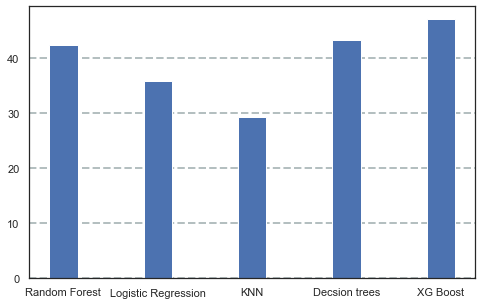

In [120]:
plt.figure(figsize=(8,5))
plt.bar(algorithms,accuracy,width=0.3)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()